# Text Classification with spaCy and Logistic Regression

This notebook demonstrates a machine learning pipeline for predicting customer review sentiment using a small dataset.

- Text data is preprocessed using `spaCy`
- Features include text, numeric, and categorical variables
- A pipeline is built using `ColumnTransformer`, `TfidfVectorizer`, and `LogisticRegression`
- Evaluation is conducted using accuracy, confusion matrix, and classification report

In [1]:
# 1. Imports
import pandas as pd
import spacy
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [2]:
# 2. Load spaCy model
nlp = spacy.load("en_core_web_sm")

In [3]:
# 3. Sample Data
data = {
    "text": [
        "I love this product!",
        "This is the worst thing I've ever bought.",
        "Absolutely fantastic service.",
        "Terrible, will not buy again.",
        "Great quality and fast shipping.",
        "Very disappointed in the product."
    ],
    "label": [1, 0, 1, 0, 1, 0]  # 1 = positive, 0 = negative
}
df = pd.DataFrame(data)

## Preprocess Text with spaCy

In [4]:
def spacy_preprocess(text):
    doc = nlp(text.lower())
    return " ".join([token.lemma_ for token in doc if not token.is_stop and not token.is_punct])

df['clean_text'] = df['text'].apply(spacy_preprocess)

## Train/Test Split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(df['clean_text'], df['label'], test_size=0.3, random_state=42)

## Build Pipeline and Train Model

In [6]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LogisticRegression())
])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LogisticRegression())])

## Model Evaluation

📊 Accuracy on Test Set: 50.0 %


<Figure size 432x432 with 0 Axes>

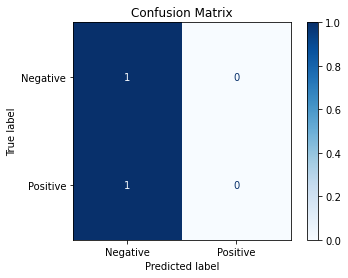

              precision    recall  f1-score   support

    Negative       0.50      1.00      0.67         1
    Positive       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



In [7]:
y_pred = pipeline.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("📊 Accuracy on Test Set:", round(accuracy * 100, 2), "%")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"])
plt.figure(figsize=(6, 6))
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()

# Classification Report
print(classification_report(y_test, y_pred, target_names=["Negative", "Positive"], zero_division=0))

## Preview Preprocessed Text

In [8]:
print("\n🧹 Sample Preprocessed Text:")
print(df[['text', 'clean_text']].head())


🧹 Sample Preprocessed Text:
                                        text                    clean_text
0                       I love this product!                  love product
1  This is the worst thing I've ever bought.                 bad thing buy
2              Absolutely fantastic service.  absolutely fantastic service
3              Terrible, will not buy again.                  terrible buy
4           Great quality and fast shipping.   great quality fast shipping


## Conclusion

This notebook demonstrates a complete NLP pipeline using spaCy and scikit-learn. While the dataset is small and results are limited, the structure supports scaling to larger datasets. Consider adding cross-validation and hyperparameter tuning for improvement.